<a href="https://colab.research.google.com/github/phantheminhchau1/phantichdulieupython/blob/main/thongkemota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 200><center>Thống kê mô tả</center></font>
<hr  width="30%" align="center" />
<p align='right'>Phan Thế Minh Châu</p>
<p align='right'>20E1020067</p>
<br>

**Khai báo thư viện:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

**Đọc dữ liệu:**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PhanTheMinhChau/phantichdulieupython/main/data/Inc_Exp_Data.csv")
df.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


#các số liệu thống kê cơ bản:

In [3]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


### Các hàm tính số liệu:

In [4]:
def mean(data):       #Tính giá trị trung bình 
  return data.mean()
def mode(data):       #Tính số yếu vị
  return data.mode()
def median(data):     #Tính số trung vị
  return data.median()
def std(data):        #Tính độ lệch chuẩn
  return data.std()
def max(data):        #Tìm giá trị lớn nhất
  return data.max()
def min(data):        #Tìm giá trị nhỏ nhất
  return data.min()
def quantile(data):   #Tìm số phân vị
  return data.quantile()

**ví dụ:**

In [5]:
# Chi phí trung bình của một hộ gia đình là:
print("Chi phí trung bình hằng tháng của một hộ gia đình là: $"+ str(mean(df["Mthly_HH_Expense"])))

Chi phí trung bình hằng tháng của một hộ gia đình là: $18818.0


In [6]:
# Thu nhập của hộ gia đình có thu nhập hằng năm cao nhất là:
print("Thu nhập của hộ gia đình có thu nhập cao nhất là: $"+ str(max(df["Annual_HH_Income"])))

Thu nhập của hộ gia đình có thu nhập cao nhất là: $1404000


In [7]:
# Thu nhập của hộ gia đình có thu nhập hằng năm thấp nhất là:
print("Thu nhập của hộ gia đình có thu nhập thấp nhất là: $"+ str(min(df["Annual_HH_Income"])))

Thu nhập của hộ gia đình có thu nhập thấp nhất là: $64200


In [8]:
# số thành viên chiếm nhiều nhất:
print("số thành viên chiếm nhiều nhất:", mode(df["No_of_Fly_Members"])[0], "người")

số thành viên chiếm nhiều nhất: 4 người


# vẽ biểu đồ:

**Bar plot:** sử dụng cho các dữ liệu định tính
- Highest_Qualified_Member
- No_of_Fly_Members
- No_of_Earning_Members


In [9]:
def bar_plot(data, title = None):
    x = df.groupby(data)[data].count()
    dt = pd.DataFrame(x)
    dt.columns = ['Percent']
    percent = []
    for i in dt['Percent']:
        x = (i/len(df[data]))*100
        percent.append(x)
    dt['Percent'] = percent
    mylabels = dt.index
    plt.title(title)
    sns.barplot(percent, mylabels, data = dt, orient = 'h')

**histogram/box plot:** sử dụng cho các dữ liệu định lượng
- Mthly_HH_Income
- Mthly_HH_Expense
- Annual_HH_Income

In [10]:
def histogram(data, title = None):
  fig = plt.figure(figsize=(5,3))
  ax = fig.add_axes([1, 1, 1.5, 1.5])
  left, width = .25, .5
  bottom, height = .25, .5
  right = left + width
  top = bottom + height
  sns.histplot(data=df[data],color='#1c66de', cumulative= True,edgecolor='none',element="poly", kde=True)
  sns.despine()
  plt.title(title)
  sns.set_context("talk")
def box_plot(data, title = None):
  fig, ax = plt.subplots(figsize=(6,6))
  ax.set_facecolor('#FFC0CB')
  plt.title(title)
  sns.boxplot(data=df[[data]],color="#00FF00",width=0.2, fliersize=20, flierprops = dict(marker='.',markerfacecolor='r'))

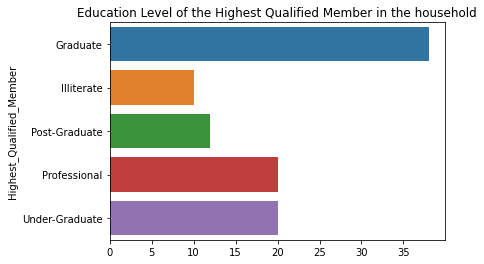

In [11]:
#biểu đồ thể hiện trình độ học vấn của thành viên có trình độ cao nhất trong gia đình
bar_plot('Highest_Qualified_Member', title = "Education Level of the Highest Qualified Member in the household")

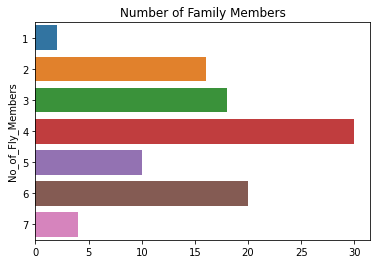

In [12]:
#Biểu đồ thể hiện Số thành viên trong gia đình
bar_plot("No_of_Fly_Members", title= "Number of Family Members")

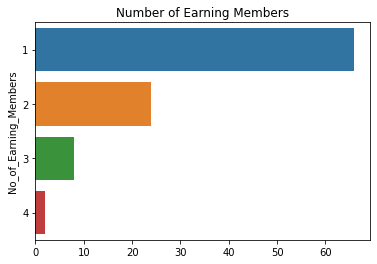

In [13]:
#Biểu đồ thể hiện số thành viên có thu nhập
bar_plot("No_of_Earning_Members", title="Number of Earning Members")

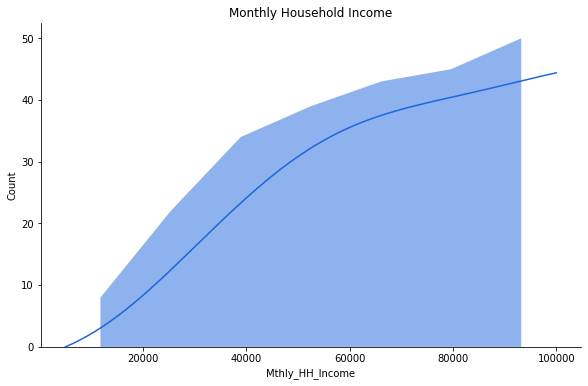

In [14]:
# Biểu đồ thể hiện sự phân bố thu nhập hàng tháng của các hộ gia đình
histogram("Mthly_HH_Income", title="Monthly Household Income")

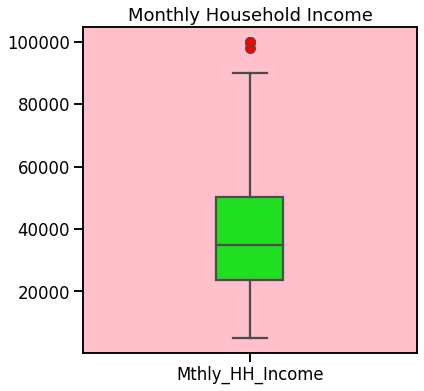

In [15]:
box_plot("Mthly_HH_Income", title="Monthly Household Income")

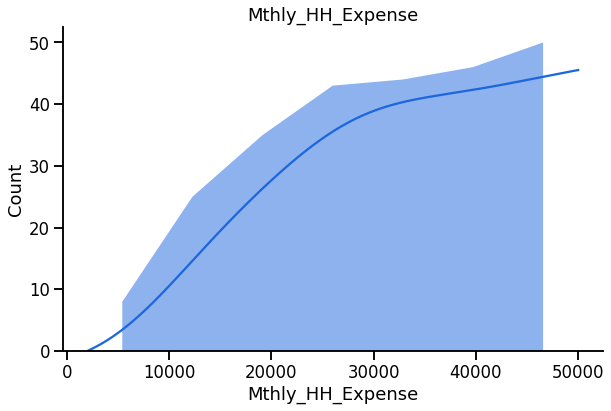

In [16]:
# Biểu đồ thể hiện sự phân bố chi phí hàng tháng của các hộ gia đình
histogram("Mthly_HH_Expense", title="Mthly_HH_Expense")

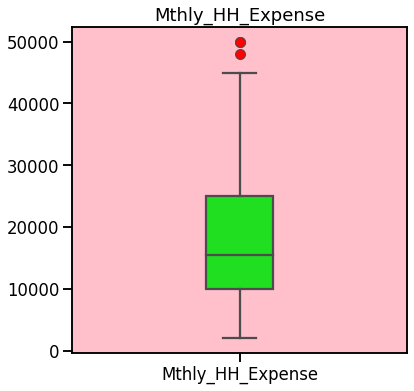

In [17]:
box_plot("Mthly_HH_Expense", title="Mthly_HH_Expense")

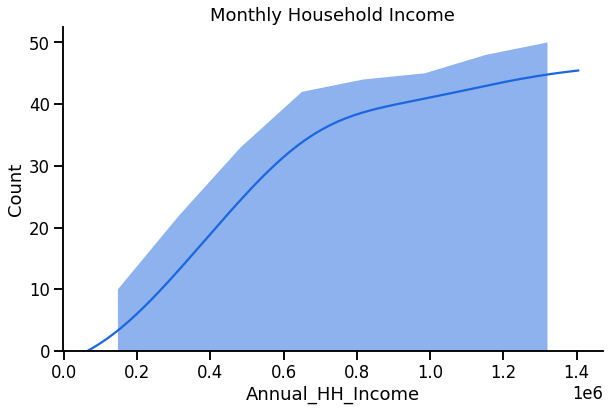

In [18]:
# Biểu đồ thể hiện sự phân bố thu nhập hàng năm của các hộ gia đình
histogram("Annual_HH_Income", title="Monthly Household Income")

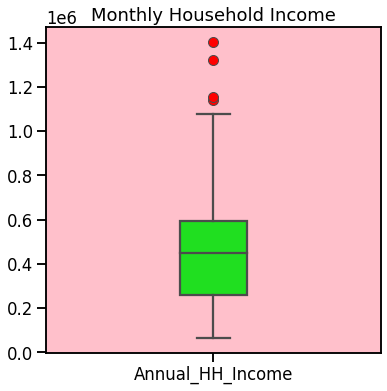

In [19]:
box_plot("Annual_HH_Income", title="Monthly Household Income")

<br>
<br>
<br>
<br>
<hr>